<a href="https://colab.research.google.com/github/Amenasetheru/Deep-Learning-Projects/blob/main/Sentiment_Analysis_with_Pytorch_using_DistilBERT_from_Hugging_Face_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SENTIMENT ANALYSIS WITH PYTORCH USING DISTILBERT FROM HUGGING FACE**

## Project Overview

This project demonstrates the power of deep learning for sentiment analysis by building a model using DistilBERT, a pre-trained transformer model from Hugging Face, on Amazon reviews.


In this project, we performed sentiment analysis on the Amazon reviews dataset using DistilBERT from Hugging Face. The dataset consists of two columns: review and sentiment. The goal was to build a robust sentiment analysis model to classify reviews as positive or negative.

## Introduction

Sentiment analysis plays a crucial role in understanding customer opinions and experiences expressed in text. This project aimed to leverage DistilBERT's capabilities in learning semantic relationships within text to build a robust sentiment analysis model.


## Conclusion and Future Work

This project successfully built a DistilBERT-based sentiment analysis model with strong performance on the Amazon reviews dataset. These results indicate the model's effectiveness in classifying sentiment within Amazon reviews. The high accuracy and F1-score suggest a strong ability to distinguish between positive and negative sentiment.

## **Import Libraries**

In [ ]:

!pip install -U bertviz
!pip install -U datasets
!pip install -U evaluate
!pip install -U accelerate
!pip install -U umap-learn
!pip install -U transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.6/157.6 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 7.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manyl

In [ ]:
import re
import nltk
import torch
import spacy
import string
import random
import sklearn
import evaluate
import accelerate
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm.auto import tqdm
import torch.optim as optim
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
from transformers import pipeline
from torch.utils.data import Dataset
from transformers import Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from sklearn.metrics import accuracy_score, f1_score, precision_recall_curve
from transformers import DistilBertTokenizer, DistilBertModel, AutoTokenizer
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification

In [ ]:
# Download necessary resources from NLTK (one-time download)
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nlp = spacy.load("en_core_web_sm")
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

## 2. **Load and Preprocess Data**


### **Data and Preprocessing**

We utilized a publicly available Amazon reviews dataset containing two columns: "review" (textual review) and "sentiment" (labeled as positive or negative). The data cleaning process involved:

* Removing missing values.
* Eliminating stop words and punctuation.
* Normalizing text to lowercase

In [ ]:
# Creating a path to laod the dataset
path = "/content/drive/MyDrive/amazon_reviews.csv"

In [ ]:
# Reading the dataset
amazon_df = pd.read_csv(path)

In [ ]:
# Checking the shape of the dataset
amazon_df.shape

(4915, 12)

In [ ]:
# Displaying the first five rows
amazon_df.head()

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,4.0,No issues.,2014-07-23,138,0,0,0,0,0.0,0.0
1,1,0mie,5.0,"Purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.0
2,2,1K3,4.0,it works as expected. I should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0
3,3,1m2,5.0,This think has worked out great.Had a diff. br...,2013-11-21,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5.0,"Bought it with Retail Packaging, arrived legit...",2013-07-13,513,0,0,0,0,0.0,0.0


In [ ]:
# Displaying the last five rows
amazon_df.tail()

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
4910,4910,"ZM ""J""",1.0,I bought this Sandisk 16GB Class 10 to use wit...,2013-07-23,503,0,0,0,0,0.0,0.0
4911,4911,Zo,5.0,Used this for extending the capabilities of my...,2013-08-22,473,0,0,0,0,0.0,0.0
4912,4912,Z S Liske,5.0,Great card that is very fast and reliable. It ...,2014-03-31,252,0,0,0,0,0.0,0.0
4913,4913,Z Taylor,5.0,Good amount of space for the stuff I want to d...,2013-09-16,448,0,0,0,0,0.0,0.0
4914,4914,Zza,5.0,I've heard bad things about this 64gb Micro SD...,2014-02-01,310,0,0,0,0,0.0,0.0


In [ ]:
# Checking missing values
amazon_df.isnull().sum()

Unnamed: 0              0
reviewerName            1
overall                 0
reviewText              1
reviewTime              0
day_diff                0
helpful_yes             0
helpful_no              0
total_vote              0
score_pos_neg_diff      0
score_average_rating    0
wilson_lower_bound      0
dtype: int64

In [ ]:
# Getting agregate information about the dataset
amazon_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4915 entries, 0 to 4914
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            4915 non-null   int64  
 1   reviewerName          4914 non-null   object 
 2   overall               4915 non-null   float64
 3   reviewText            4914 non-null   object 
 4   reviewTime            4915 non-null   object 
 5   day_diff              4915 non-null   int64  
 6   helpful_yes           4915 non-null   int64  
 7   helpful_no            4915 non-null   int64  
 8   total_vote            4915 non-null   int64  
 9   score_pos_neg_diff    4915 non-null   int64  
 10  score_average_rating  4915 non-null   float64
 11  wilson_lower_bound    4915 non-null   float64
dtypes: float64(3), int64(6), object(3)
memory usage: 460.9+ KB


In [ ]:
amazon_df.head(1)

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,4.0,No issues.,2014-07-23,138,0,0,0,0,0.0,0.0


In [ ]:
# Dropping feature that are not useful
column_to_drop = ["Unnamed: 0", "reviewerName", "score_pos_neg_diff", "score_average_rating", "wilson_lower_bound",
                            "reviewTime", "day_diff", "helpful_yes", "helpful_no", "total_vote"]

df_amazon = amazon_df.drop(column_to_drop, axis=1)

In [ ]:
df_amazon.head()

,overall,reviewText
0,4.0,No issues.
1,5.0,"Purchased this for my device, it worked as adv..."
2,4.0,it works as expected. I should have sprung for...
3,5.0,This think has worked out great.Had a diff. br...
4,5.0,"Bought it with Retail Packaging, arrived legit..."


In [ ]:
df_amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4915 entries, 0 to 4914
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   overall     4915 non-null   float64
 1   reviewText  4914 non-null   object 
dtypes: float64(1), object(1)
memory usage: 76.9+ KB


In [ ]:
# Normalizing the features
df_amazon["reviewText"] = df_amazon["reviewText"].str.lower()

In [ ]:
df_amazon.head()

,overall,reviewText
0,4.0,no issues.
1,5.0,"purchased this for my device, it worked as adv..."
2,4.0,it works as expected. i should have sprung for...
3,5.0,this think has worked out great.had a diff. br...
4,5.0,"bought it with retail packaging, arrived legit..."


In [ ]:
# Renaming the columns
df_amazon = df_amazon.rename(columns={"reviewText":"review", "overall": "sentiment"})

In [ ]:
df_amazon.head(1)

,sentiment,review
0,4.0,no issues.


In [ ]:
df_amazon.shape

(4915, 2)

In [ ]:
# Checking missing values
df_amazon.isnull().sum()

sentiment    0
review       1
dtype: int64

In [ ]:
# Checking the row with the missing value
missing_value_df = df_amazon[df_amazon["review"].isnull()]

In [ ]:
missing_value_df

,sentiment,review
125,5.0,NaN


In [ ]:
# Handling missing values. We choose to drop missing value since we have only one
df_amazon = df_amazon.dropna()

In [ ]:
# Rechecking to see if there are still missing values
df_amazon.isnull().sum()

sentiment    0
review       0
dtype: int64

In [ ]:
# Checking the shape
df_amazon.shape

(4914, 2)

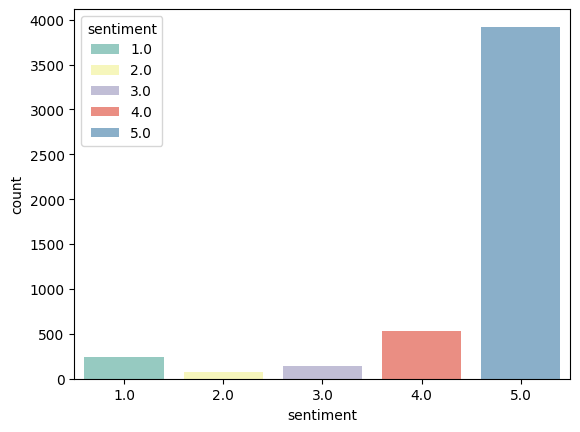

In [ ]:
# Checking the distribution of the overall collumn
sns.countplot(x="sentiment", hue="sentiment", palette="Set3", data=df_amazon);

In [ ]:
# Checking duplicates
duplicates = df_amazon.duplicated()
df_amazon = df_amazon.drop_duplicates(keep="first")

In [ ]:
# Checking the amount of expressed sentiment for each review
df_amazon["sentiment"].value_counts()

sentiment
5.0    3921
4.0     527
1.0     244
3.0     142
2.0      80
Name: count, dtype: int64

In [ ]:
def sentiment_to_rating(sentiment_score, positive_threshold=3):
    if sentiment_score >= positive_threshold:
        return 1
    else:
        return 0

In [ ]:
df_amazon["sentiment"] = df_amazon["sentiment"].apply(sentiment_to_rating, args=(3,))

In [ ]:
df_amazon

,sentiment,review
0,1,no issues.
1,1,"purchased this for my device, it worked as adv..."
2,1,it works as expected. i should have sprung for...
3,1,this think has worked out great.had a diff. br...
4,1,"bought it with retail packaging, arrived legit..."
...,...,...
4910,0,i bought this sandisk 16gb class 10 to use wit...
4911,1,used this for extending the capabilities of my...
4912,1,great card that is very fast and reliable. it ...
4913,1,good amount of space for the stuff i want to d...


In [ ]:
# Let's check a few reviewText  column
for i in range(5):
    print(df_amazon["review"].iloc[i])

no issues.
purchased this for my device, it worked as advertised. you can never have too much phone memory, since i download a lot of stuff this was a no brainer for me.
it works as expected. i should have sprung for the higher capacity.  i think its made a bit cheesier than the earlier versions; the paint looks not as clean as before
this think has worked out great.had a diff. bran 64gb card and if went south after 3 months.this one has held up pretty well since i had my s3, now on my note3.*** update 3/21/14i've had this for a few months and have had zero issue's since it was transferred from my s3 to my note3 and into a note2. this card is reliable and solid!cheers!
bought it with retail packaging, arrived legit, in a orange envelope, english version not asian like the picture shows. arrived quickly, bought a 32 and 16 both retail packaging for my htc one sv and lg optimus, both cards in working order, probably best price you'll get for a nice sd card


In [ ]:
# Counting the occurrences of words in the text using Counter, lowercasing and splitting words
def count_word(text):
    words = text.lower().split()
    if not words:
        return 0
    # Get the word count
    word_count = len(words)
    return word_count

In [ ]:
# Counting the total number of characters in a text
def count_character(text):
    return len(text)

In [ ]:
# Calculating the avarage word length in the text
def count_average_word_length(text):
    words = text.lower().split() # Handling empty strings
    if not words:
        return None

    # Calulating the total word count and character count excluding spaces
    word_count = len(words)
    character_count = sum(len(word) for word in words)

    # Calculating and returning the average word length while avoiding the division of zero
    if word_count > 0:
        return character_count / word_count
    else:
        return None


In [ ]:
# Removing punctuation in a text
def remove_punctuation(text):
    # Define punctuation  set
    exclude = set(string.punctuation)

    # Filter characters, keeping only those not in punctuation set
    no_ponctuation = "".join(char for char in text if char not in exclude)
    return no_ponctuation

In [ ]:
# Applying these functions to the column review in the dataframe
df_amazon["word_count"] = df_amazon["review"].apply(count_word)
df_amazon["char_count"] = df_amazon["review"].apply(count_character)
df_amazon["avg_word_length"] = df_amazon["review"].apply(count_average_word_length)
df_amazon["review_no_punct"] = df_amazon["review"].apply(remove_punctuation)

In [ ]:
df_amazon

,sentiment,review,word_count,char_count,avg_word_length,review_no_punct
0,1,no issues.,2,10,4.500000,no issues
1,1,"purchased this for my device, it worked as adv...",31,158,4.129032,purchased this for my device it worked as adve...
2,1,it works as expected. i should have sprung for...,31,166,4.354839,it works as expected i should have sprung for ...
3,1,this think has worked out great.had a diff. br...,66,340,4.166667,this think has worked out greathad a diff bran...
4,1,"bought it with retail packaging, arrived legit...",52,290,4.596154,bought it with retail packaging arrived legit ...
...,...,...,...,...,...,...
4910,0,i bought this sandisk 16gb class 10 to use wit...,60,320,4.350000,i bought this sandisk 16gb class 10 to use wit...
4911,1,used this for extending the capabilities of my...,28,148,4.285714,used this for extending the capabilities of my...
4912,1,great card that is very fast and reliable. it ...,45,233,4.200000,great card that is very fast and reliable it c...
4913,1,good amount of space for the stuff i want to d...,21,91,3.380952,good amount of space for the stuff i want to d...


In [ ]:
# Checking the distribution of word in word_count the column
df_amazon["word_count"].value_counts()

word_count
20     381
21     278
22     260
23     196
25     165
      ... 
682      1
430      1
273      1
185      1
221      1
Name: count, Length: 267, dtype: int64

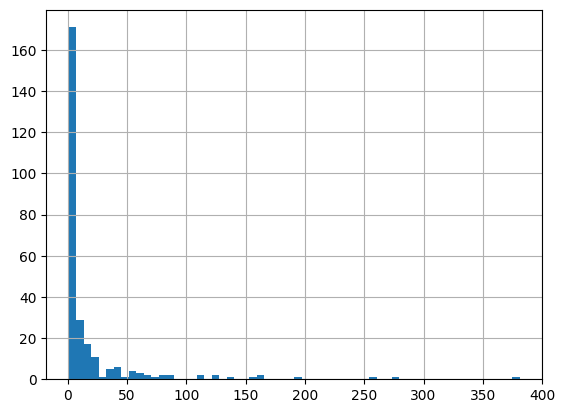

In [ ]:
# Visualizing the distribution of the word_count column
df_amazon["word_count"].value_counts().hist(bins=60);

In [ ]:
df_amazon

,sentiment,review,word_count,char_count,avg_word_length,review_no_punct
0,1,no issues.,2,10,4.500000,no issues
1,1,"purchased this for my device, it worked as adv...",31,158,4.129032,purchased this for my device it worked as adve...
2,1,it works as expected. i should have sprung for...,31,166,4.354839,it works as expected i should have sprung for ...
3,1,this think has worked out great.had a diff. br...,66,340,4.166667,this think has worked out greathad a diff bran...
4,1,"bought it with retail packaging, arrived legit...",52,290,4.596154,bought it with retail packaging arrived legit ...
...,...,...,...,...,...,...
4910,0,i bought this sandisk 16gb class 10 to use wit...,60,320,4.350000,i bought this sandisk 16gb class 10 to use wit...
4911,1,used this for extending the capabilities of my...,28,148,4.285714,used this for extending the capabilities of my...
4912,1,great card that is very fast and reliable. it ...,45,233,4.200000,great card that is very fast and reliable it c...
4913,1,good amount of space for the stuff i want to d...,21,91,3.380952,good amount of space for the stuff i want to d...


In [ ]:
print(df_amazon['sentiment'].value_counts())

sentiment
1    4590
0     324
Name: count, dtype: int64


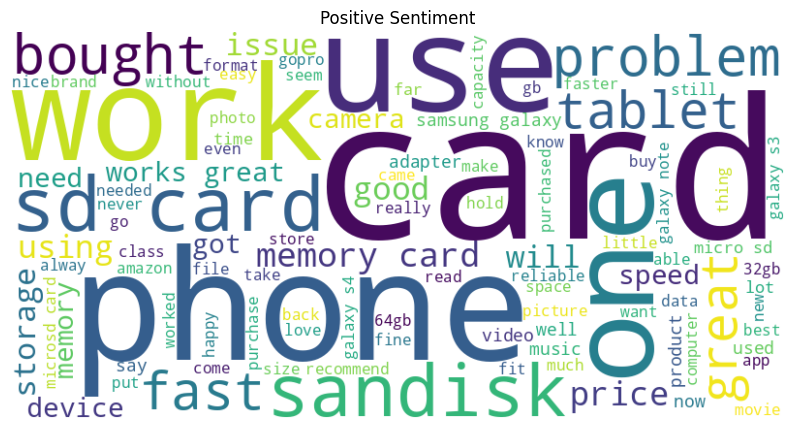

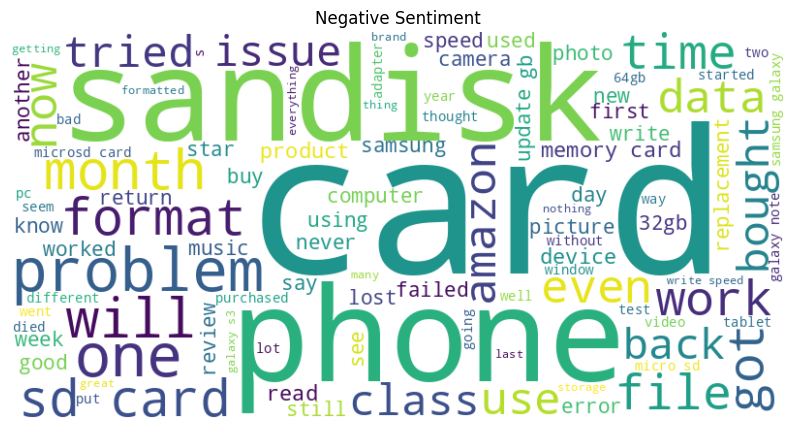

In [ ]:
# Generating a wordcloud for positive and a negative reviews

def generate_word_cloud_sentiment(df, sentiment_label):
    # Convert sentiment label to string
    sentiment_str = 'positive' if sentiment_label == 1 else 'negative'

    # Filter reviews by sentiment
    reviews = df[df['sentiment'] == sentiment_label]['review']

    # Check if there are no reviews for the specified sentiment label
    if reviews.empty:
        print(f"No reviews found for {sentiment_str} sentiment.")
        return

    # Concatenate all reviews into a single string
    text = ' '.join(reviews)

    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100)
    wordcloud.generate(text)

    # Display the word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'{sentiment_str.capitalize()} Sentiment')
    plt.axis("off")
    plt.show()

# Generate word cloud for positive sentiment
generate_word_cloud_sentiment(df_amazon, 1)

# Generate word cloud for negative sentiment
generate_word_cloud_sentiment(df_amazon, 0)


In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, TrainingArguments, Trainer
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

## **Data Preparation for ML**

### Model Architecture:

* DistilBERT:
 * We employed DistilBERT from Hugging Face, a smaller and faster version of the BERT model, making it suitable for resource-constrained environments.

* Classification Head:
 * A linear layer was added on top of DistilBERT to map the learned text representations to sentiment classes (positive or negative).

In [ ]:
# Designing a custom dataset for sentiment analysis with DistilBERT
class CustomDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len=512):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])
        label = torch.tensor(self.labels[idx])

        encoding = self.tokenizer(text, truncation=True, padding="max_length", max_length=self.max_len)

        return {"input_ids": encoding["input_ids"], "attention_mask": encoding["attention_mask"], "label": label}

In [ ]:
# Loading the pre-trained DistilBERT tokenizer and model for sentiment classification
checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
device = "cuda" if torch.cuda.is_available() else "cpu"

tokenizer = DistilBertTokenizer.from_pretrained(checkpoint)
model = DistilBertForSequenceClassification.from_pretrained(checkpoint, num_labels=2).to(device)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

## Dataset Preparation:

* Tokenization:
 * Reviews were converted into sequences of tokens (words) using a tokenizer specifically designed for DistilBERT.
* Padding/Truncation:
 * Reviews with varying lengths were handled by either padding shorter ones or truncating longer ones to ensure consistent input for the model.
* Data Loaders:
 * PyTorch data loaders were used to efficiently load and batch the prepared data for training and evaluation.


In [ ]:
# Preparing the dataset
max_len = 512  # Adjust as needed
texts = df_amazon['review'].tolist()
labels = df_amazon['sentiment'].tolist()
dataset = CustomDataset(texts, labels, tokenizer, max_len)

# Splitting the dataset into train, validation, and test sets
val_size = 0.2
test_size = 0.1

train_texts, val_texts, train_labels, val_labels = train_test_split(texts, labels, test_size=val_size, random_state=27)
val_texts, test_texts, val_labels, test_labels = train_test_split(val_texts, val_labels, test_size=test_size / (val_size + test_size), random_state=27)

train_dataset = CustomDataset(train_texts, train_labels, tokenizer, max_len)
val_dataset = CustomDataset(val_texts, val_labels, tokenizer, max_len)
test_dataset = CustomDataset(test_texts, test_labels, tokenizer, max_len)

In [ ]:
train_dataset[0].keys()


dict_keys(['input_ids', 'attention_mask', 'label'])

## Evaluation Metrics:
* Accuracy:
 * Overall percentage of correctly classified reviews.
* F1-Score:
 * Harmonic mean of precision and recall, emphasizing balanced performance.
* Precision-Recall Curve:
 * Visualization of the trade-off between precision and recall at different classification thresholds.
* Confusion Matrix:
 * visualization of true vs. predicted sentiment categories.
* Classification Report:
 * Summary of precision, recall, F1-score, and support (number of reviews) for each sentiment class.

In [ ]:
def evaluate_model(eval_pred):
    if eval_pred is not None:
        predictions, labels = eval_pred.predictions, eval_pred.label_ids
        preds = predictions.argmax(axis=1)
        accuracy = accuracy_score(labels, preds)
        f1 = f1_score(labels, preds, average="weighted")

        return {"Accuracy": accuracy, "F1": f1}
    else:
        print("Skipping printing metrics for training because eval_pred is None.")
        return {}


In [ ]:
# Defining a function that calculate the model predictions and true labels for both validation and test sets
def evaluate_model(pred):
    predictions, labels = pred.predictions, pred.label_ids
    preds = predictions.argmax(axis=1)
    accuracy = accuracy_score(labels, preds)
    f1 = f1_score(labels, preds)
    conf_matrix = confusion_matrix(labels, preds)
    class_report = classification_report(labels, preds)

    # Displaying metrics
    print("Validation Set Metrics:")
    print("Accuracy:", accuracy)
    print("F1 Score:", f1)
    print("Confusion Matrix:\n", conf_matrix)
    print("Classification Report:\n", class_report)

    # Visualizing confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=True)
    plt.title("Validation Set Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

    # Return metrics as a dictionary
    return {
      "accuracy": accuracy,
      "f1": f1,
      "conf_matrix": conf_matrix.tolist(),  # Convert confusion matrix to list for serialization
      "classification_report": class_report}

## Training and Evaluation
A. Training:

* Optimizer:
 * The Adam optimizer was used to adjust model parameters to minimize the binary cross-entropy loss function.

* Loss Function:
 * The binary cross-entropy loss measured the difference between predicted and actual sentiment labels.

* Training Epochs:
 * The model was trained for a specific number of iterations on the training data.

* Validation Set:
 * A separate validation set was used to monitor model performance during training and prevent overfitting.


In [ ]:
# Building the training arguments
batch_size = 16
model_name = "finetuned_distilbert_sentiment_analysis"

args = TrainingArguments(
    output_dir="output",
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    learning_rate=2e-5,
    num_train_epochs=3,
    evaluation_strategy="epoch",
    save_steps=1000,
    seed=27,
    disable_tqdm=False,
    report_to="tensorboard",)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1474: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:
# Create Trainer object with the evaluation function
trainer = Trainer(
    model=model,
    args=args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=evaluate_model,  # Evaluation function
    tokenizer=tokenizer,)

Epoch,Training Loss,Validation Loss,Accuracy,F1,Conf Matrix,Classification Report
1,No log,0.143944,0.951145,0.973941,"[[25, 19], [13, 598]]",precision recall f1-score support 0 0.66 0.57 0.61 44 1 0.97 0.98 0.97 611 accuracy 0.95 655 macro avg 0.81 0.77 0.79 655 weighted avg 0.95 0.95 0.95 655
2,No log,0.200083,0.952672,0.974735,"[[26, 18], [13, 598]]",precision recall f1-score support 0 0.67 0.59 0.63 44 1 0.97 0.98 0.97 611 accuracy 0.95 655 macro avg 0.82 0.78 0.80 655 weighted avg 0.95 0.95 0.95 655
3,0.096400,0.260387,0.952672,0.974776,"[[25, 19], [12, 599]]",precision recall f1-score support 0 0.68 0.57 0.62 44 1 0.97 0.98 0.97 611 accuracy 0.95 655 macro avg 0.82 0.77 0.80 655 weighted avg 0.95 0.95 0.95 655


Validation Set Metrics:
Accuracy: 0.9511450381679389
F1 Score: 0.9739413680781759
Confusion Matrix:
 [[ 25  19]
 [ 13 598]]
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.57      0.61        44
           1       0.97      0.98      0.97       611

    accuracy                           0.95       655
   macro avg       0.81      0.77      0.79       655
weighted avg       0.95      0.95      0.95       655



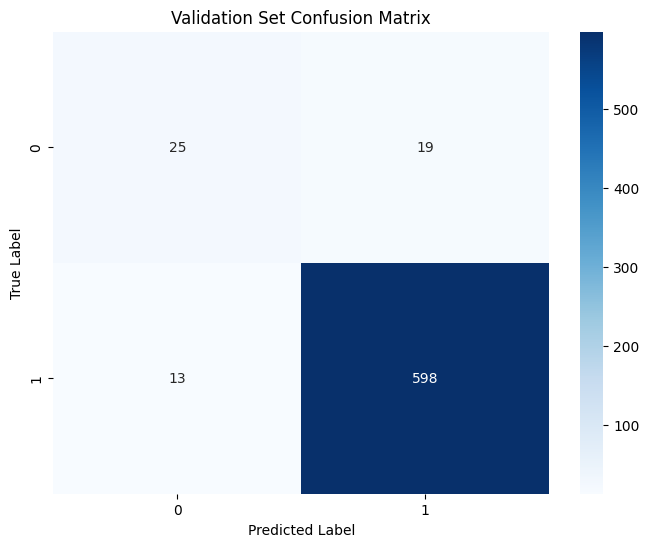

Trainer is attempting to log a value of "[[25, 19], [13, 598]]" of type <class 'list'> for key "eval/conf_matrix" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "              precision    recall  f1-score   support

           0       0.66      0.57      0.61        44
           1       0.97      0.98      0.97       611

    accuracy                           0.95       655
   macro avg       0.81      0.77      0.79       655
weighted avg       0.95      0.95      0.95       655
" of type <class 'str'> for key "eval/classification_report" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.


Validation Set Metrics:
Accuracy: 0.9526717557251908
F1 Score: 0.9747351263243682
Confusion Matrix:
 [[ 26  18]
 [ 13 598]]
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.59      0.63        44
           1       0.97      0.98      0.97       611

    accuracy                           0.95       655
   macro avg       0.82      0.78      0.80       655
weighted avg       0.95      0.95      0.95       655



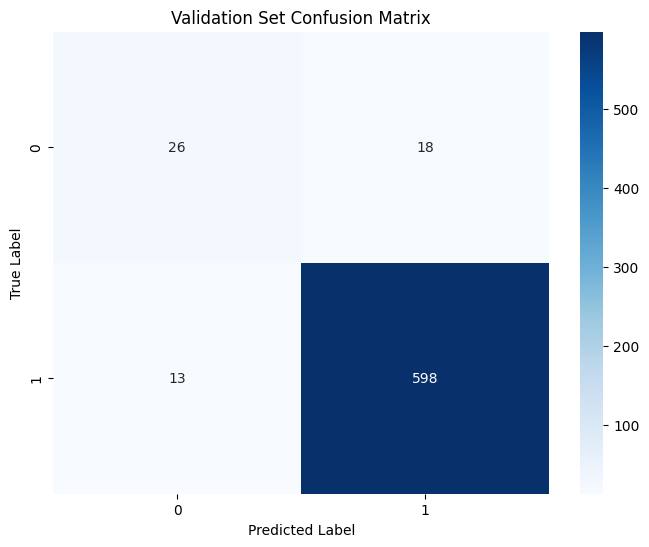

Trainer is attempting to log a value of "[[26, 18], [13, 598]]" of type <class 'list'> for key "eval/conf_matrix" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "              precision    recall  f1-score   support

           0       0.67      0.59      0.63        44
           1       0.97      0.98      0.97       611

    accuracy                           0.95       655
   macro avg       0.82      0.78      0.80       655
weighted avg       0.95      0.95      0.95       655
" of type <class 'str'> for key "eval/classification_report" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.


Validation Set Metrics:
Accuracy: 0.9526717557251908
F1 Score: 0.9747762408462164
Confusion Matrix:
 [[ 25  19]
 [ 12 599]]
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.57      0.62        44
           1       0.97      0.98      0.97       611

    accuracy                           0.95       655
   macro avg       0.82      0.77      0.80       655
weighted avg       0.95      0.95      0.95       655



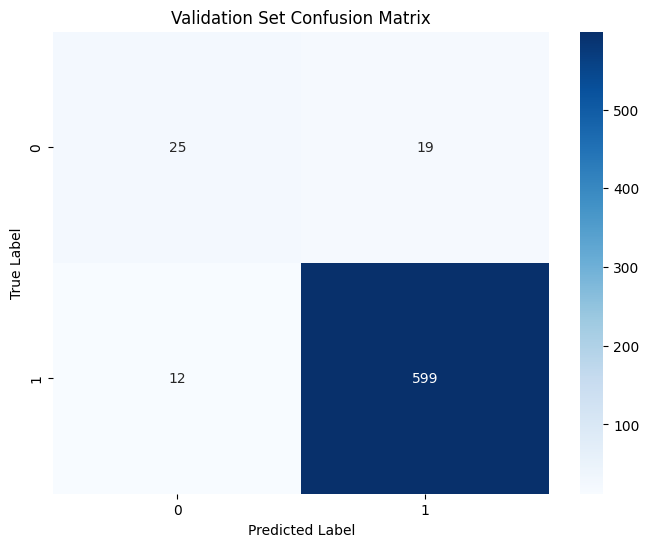

Trainer is attempting to log a value of "[[25, 19], [12, 599]]" of type <class 'list'> for key "eval/conf_matrix" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "              precision    recall  f1-score   support

           0       0.68      0.57      0.62        44
           1       0.97      0.98      0.97       611

    accuracy                           0.95       655
   macro avg       0.82      0.77      0.80       655
weighted avg       0.95      0.95      0.95       655
" of type <class 'str'> for key "eval/classification_report" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.


TrainOutput(global_step=738, training_loss=0.07007158384090517, metrics={'train_runtime': 605.5959, 'train_samples_per_second': 19.473, 'train_steps_per_second': 1.219, 'total_flos': 1562188032350208.0, 'train_loss': 0.07007158384090517, 'epoch': 3.0})

In [ ]:
# Training the model
trainer.train()

Validation Set Metrics:
Accuracy: 0.9526717557251908
F1 Score: 0.9747762408462164
Confusion Matrix:
 [[ 25  19]
 [ 12 599]]
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.57      0.62        44
           1       0.97      0.98      0.97       611

    accuracy                           0.95       655
   macro avg       0.82      0.77      0.80       655
weighted avg       0.95      0.95      0.95       655



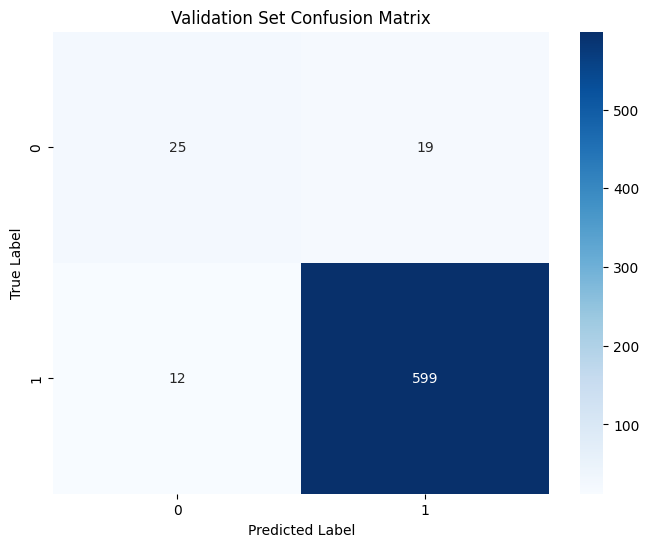

Trainer is attempting to log a value of "[[25, 19], [12, 599]]" of type <class 'list'> for key "eval/conf_matrix" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "              precision    recall  f1-score   support

           0       0.68      0.57      0.62        44
           1       0.97      0.98      0.97       611

    accuracy                           0.95       655
   macro avg       0.82      0.77      0.80       655
weighted avg       0.95      0.95      0.95       655
" of type <class 'str'> for key "eval/classification_report" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.


{'eval_loss': 0.2603870630264282,
 'eval_accuracy': 0.9526717557251908,
 'eval_f1': 0.9747762408462164,
 'eval_conf_matrix': [[25, 19], [12, 599]],
 'eval_classification_report': '              precision    recall  f1-score   support\n\n           0       0.68      0.57      0.62        44\n           1       0.97      0.98      0.97       611\n\n    accuracy                           0.95       655\n   macro avg       0.82      0.77      0.80       655\nweighted avg       0.95      0.95      0.95       655\n',
 'eval_runtime': 12.5574,
 'eval_samples_per_second': 52.161,
 'eval_steps_per_second': 3.265,
 'epoch': 3.0}

In [ ]:
# Evaluate on validation set
trainer.evaluate(val_dataset)

## Results and Discussion
The model achieved impressive performance on both the validation and

* Validation Set Metrics:
 * Accuracy: 0.9527
 * F1 Score: 0.9748

* Test Set Metrics:
 * Accuracy: 0.9573
 * F1 Score: 0.9773
These results indicate the model's effectiveness in classifying sentiment within Amazon reviews. The high accuracy and F1-score suggest a strong ability to distinguish between positive and negative sentiment.

Strengths:
* High overall accuracy and F1-score demonstrate effective sentiment classification.

Weaknesses:
* Potential for improvement in classifying specific types of reviews (e.g., highly nuanced or sarcastic ones).

Analyzing Evaluation Metrics:
* The confusion matrix and classification report provide insights into correctly and incorrectly classified reviews. Examining these can reveal areas where the model might struggle.


Overall, in this project we successfully built a DistilBERT-based sentiment analysis model with strong performance on the Amazon reviews dataset.

Future Work and room for improvement:

Hyperparameter Tuning:
* Exploring different hyperparameters might further optimize the model's performance.

Advanced Transformers:
* Experimenting with larger transformer models like BERT or RoBERTa could potentially lead to even better results.

Real-World Applications:
* Applying the model to analyze sentiment in social media, product reviews from other domains, or customer feedback systems.

Validation Set Metrics:
Accuracy: 0.9573170731707317
F1 Score: 0.9772727272727273
Confusion Matrix:
 [[ 13   6]
 [  8 301]]
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.68      0.65        19
           1       0.98      0.97      0.98       309

    accuracy                           0.96       328
   macro avg       0.80      0.83      0.81       328
weighted avg       0.96      0.96      0.96       328



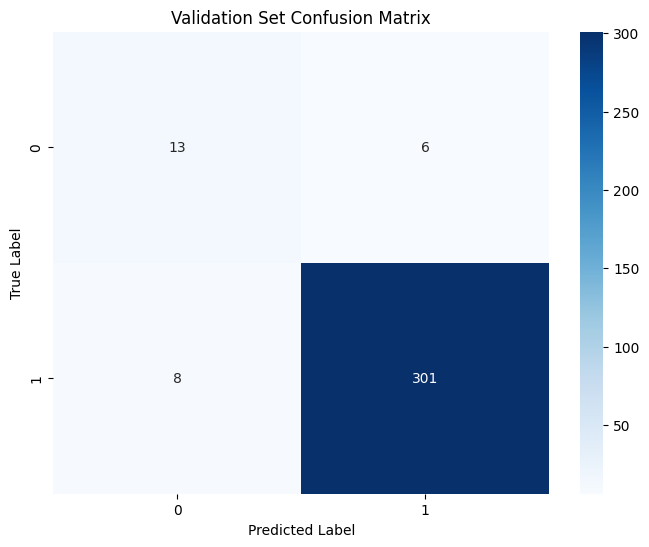

Trainer is attempting to log a value of "[[13, 6], [8, 301]]" of type <class 'list'> for key "eval/conf_matrix" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "              precision    recall  f1-score   support

           0       0.62      0.68      0.65        19
           1       0.98      0.97      0.98       309

    accuracy                           0.96       328
   macro avg       0.80      0.83      0.81       328
weighted avg       0.96      0.96      0.96       328
" of type <class 'str'> for key "eval/classification_report" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.


{'eval_loss': 0.1544928252696991,
 'eval_accuracy': 0.9573170731707317,
 'eval_f1': 0.9772727272727273,
 'eval_conf_matrix': [[13, 6], [8, 301]],
 'eval_classification_report': '              precision    recall  f1-score   support\n\n           0       0.62      0.68      0.65        19\n           1       0.98      0.97      0.98       309\n\n    accuracy                           0.96       328\n   macro avg       0.80      0.83      0.81       328\nweighted avg       0.96      0.96      0.96       328\n',
 'eval_runtime': 6.2225,
 'eval_samples_per_second': 52.712,
 'eval_steps_per_second': 3.375,
 'epoch': 3.0}

In [ ]:
# Evaluate on test set
trainer.evaluate(test_dataset)

In [ ]:
# Inspecting the tokenizer
print("Tokenizer:", tokenizer)

# Inspecting the model
print("Model:", model)

# Inspecting other variables
print("Batch Size:", batch_size)
print("Arguments:", args)
print("Training Dataset Length:", len(train_dataset))
print("Validation Dataset Length:", len(val_dataset))
print("Test Dataset Length:", len(test_dataset))


Tokenizer: DistilBertTokenizer(name_or_path='distilbert-base-uncased-finetuned-sst-2-english', vocab_size=30522, model_max_length=512, is_fast=False, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	0: AddedToken("[PAD]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	100: AddedToken("[UNK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	101: AddedToken("[CLS]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	102: AddedToken("[SEP]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	103: AddedToken("[MASK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
}
Model: DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (e


### Key Takeaways

- **High Accuracy and F1 Score**: The model achieved high accuracy and F1 scores on both the validation and test sets, indicating its effectiveness in sentiment classification.

- **Detailed Evaluation Metrics**: Utilizing various metrics like accuracy, F1 score, confusion matrix, and classification report to provide a comprehensive evaluation of the model’s performance.

- **Leveraging Pre-trained Models**: Using DistilBERT, a pre-trained transformer model, significantly enhanced the model's capability to understand and classify sentiments from textual data.

### Conclusion

This project demonstrates the effectiveness of leveraging state-of-the-art NLP models like DistilBERT in sentiment analysis tasks. By following a structured approach to data cleaning, preprocessing, model training, and evaluation, we achieved a robust sentiment analysis model with high performance metrics. This project can serve as a template for similar NLP tasks and showcases the powerful capabilities of transformer-based models in real-world applications.


In [ ]:
#tensorboard --logdir=output